# Introduction

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import numpy as np


# Load datasets
Here we have loaded datasets and after normalizing we have stored them as pickle file for our future work.The main datasets were collected from this link: https://www.kaggle.com/alessiocorrado99/animals10

In [ ]:
for category in CATEGORIES:  # do dogs ,cats, panadas ect
    path = os.path.join(DATADIR,category)  # create path to all animal picture file
    for img in os.listdir(path):  # iterate over each image per animal
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
    
    
    

In [ ]:
print(img_array.shape)
IMG_SIZE = 80

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()



training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats and pandas

        path = os.path.join(DATADIR,category)  # create path to dogs and cats and pandas
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))


#shuffle the training data
import random

random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])
    
    
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

#storing them in pickle

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# Making Models

Here we will try different dense layer value , layer size value , convocation layers value and generate different model.Every model will generate graph showing epoch accuracy and loss.Those will be shown in Tensorboard.From the graph we will try to find out which model will give best optimize result.From that model we will take out the dense layer value ,layer size value and convocation layers value.

In [3]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X=np.array(X/255.0)
y=np.array(y)

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(10))
            model.add(Activation('softmax'))

            tensorboard = TensorBoard(log_dir = 'C:\\Users\\mdabd\\logs\\{}'.format(NAME))

            model.compile(loss='sparse_categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=20,
                      validation_split=0.3,
                      callbacks=[tensorboard])

1-conv-32-nodes-0-dense-1600228869
Train on 18325 samples, validate on 7854 samples
Epoch 1/20
18325/18325 [==============================] - 42s 2ms/sample - loss: 1.8672 - accuracy: 0.3683 - val_loss: 1.7120 - val_accuracy: 0.4291
Epoch 2/20
18325/18325 [==============================] - 41s 2ms/sample - loss: 1.4292 - accuracy: 0.5306 - val_loss: 1.5588 - val_accuracy: 0.4892
Epoch 3/20
18325/18325 [==============================] - 42s 2ms/sample - loss: 1.1458 - accuracy: 0.6325 - val_loss: 1.6173 - val_accuracy: 0.4631
Epoch 4/20
18325/18325 [==============================] - 46s 3ms/sample - loss: 0.9076 - accuracy: 0.7186 - val_loss: 1.5808 - val_accuracy: 0.4874
Epoch 5/20
18325/18325 [==============================] - 46s 3ms/sample - loss: 0.7259 - accuracy: 0.7838 - val_loss: 1.6873 - val_accuracy: 0.4752
Epoch 6/20
18325/18325 [==============================] - 43s 2ms/sample - loss: 0.5677 - accuracy: 0.8438 - val_loss: 1.6989 - val_accuracy: 0.4927
Epoch 7/20
18325/18325

# Graph from Models
From the above models we have generated graphs for each of the model and they are shown below.First graph is for epoch accuracy and second one is for epoch loss from those models.

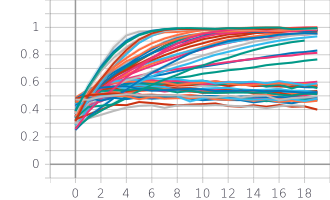

In [10]:
from IPython.display import Image
Image("./Downloads/epoch_accuracy.png")


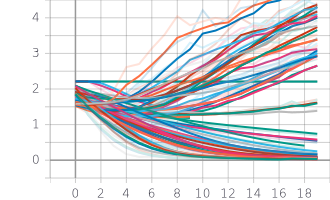

In [12]:
from IPython.display import Image
Image("./Downloads/epoch_loss(1).png")

# Selected Model
After analyzing we have seen that 128 nodes , 1 convo layer , 0 dense at 9 epoch gives better solution. So we have taken the value and made a model with that value and saved it separately.

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X=np.array(X/255.0)
y=np.array(y)


dense_layers = [0]
layer_sizes = [128]
conv_layers = [1]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(10))
            model.add(Activation('softmax'))

            tensorboard = TensorBoard(log_dir = 'C:\\Users\\mdabd\\logs\\{}'.format(NAME))

            model.compile(loss='sparse_categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=9,
                      validation_split=0.3,
                      callbacks=[tensorboard])
model.save('128x1_selected_model-CNN.model')

# Result
Lastly as our validation loss is not small so we were facing a lot wrong perdiction in the time of testing.Though our loss is low and accuracy is high but because of high validation loss that prediction was 20-40% correct while we were testing the model with picture that was not included in our system.With this model we have done some testing using a cow and dog picture.We did not include the wrong prediction result here.

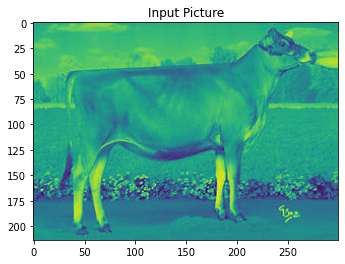

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


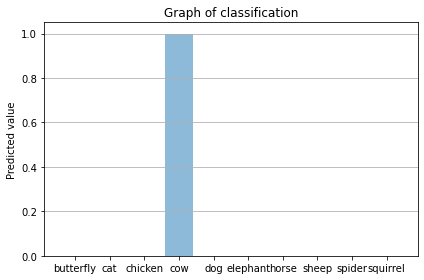

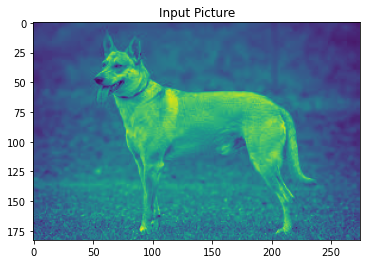

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


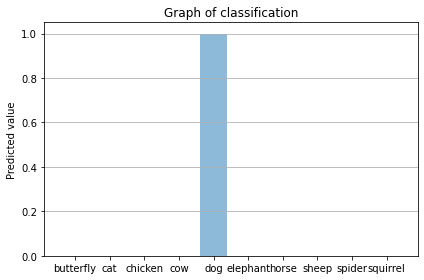

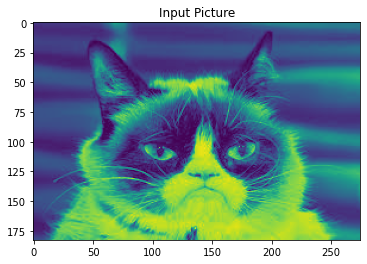

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


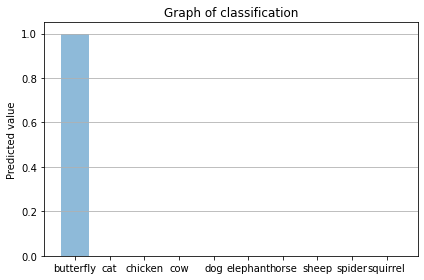

In [8]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

CATEGORIES = ["butterfly","cat","chicken","cow","dog","elephant", "horse","sheep","spider","squirrel"] 


def prepare(filepath):
    IMG_SIZE = 80  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.


model = tf.keras.models.load_model("128x1_selected_model-CNN.model")

### for cow classification

img = cv2.imread('./data/Sample/cow.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('Input Picture')
plt.show()

prediction = model.predict([prepare('C:/Users/mdabd/data/Sample/cow.jpeg')])
print(prediction)  # will be a list in a list.

x_pos = np.arange(len(CATEGORIES))
CTEs = [prediction[0][0],prediction[0][1],prediction[0][2],prediction[0][3],prediction[0][4],prediction[0][5],prediction[0][6],prediction[0][7],prediction[0][8],prediction[0][9]]
fig, ax = plt.subplots()


ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Predicted value')
ax.set_xticks(x_pos)
ax.set_xticklabels(CATEGORIES)
ax.set_title('Graph of classification')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()


## for dog classification

img = cv2.imread('./data/Sample/dog1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('Input Picture')
plt.show()

prediction = model.predict([prepare('C:/Users/mdabd/data/Sample/dog1.jpg')])
#img = cv2.imread('/data/Sample/dog1.jpg')
 


print(prediction)  # will be a list in a list.

x_pos = np.arange(len(CATEGORIES))
CTEs = [prediction[0][0],prediction[0][1],prediction[0][2],prediction[0][3],prediction[0][4],prediction[0][5],prediction[0][6],prediction[0][7],prediction[0][8],prediction[0][9]]
fig, ax = plt.subplots()


ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Predicted value')
ax.set_xticks(x_pos)
ax.set_xticklabels(CATEGORIES)
ax.set_title('Graph of classification')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()


##for cat 

img = cv2.imread('./data/Sample/cat1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('Input Picture')
plt.show()

prediction = model.predict([prepare('C:/Users/mdabd/data/Sample/cat1.jpg')])
#img = cv2.imread('/data/Sample/dog1.jpg')
 


print(prediction)  # will be a list in a list.

x_pos = np.arange(len(CATEGORIES))
CTEs = [prediction[0][0],prediction[0][1],prediction[0][2],prediction[0][3],prediction[0][4],prediction[0][5],prediction[0][6],prediction[0][7],prediction[0][8],prediction[0][9]]
fig, ax = plt.subplots()


ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Predicted value')
ax.set_xticks(x_pos)
ax.set_xticklabels(CATEGORIES)
ax.set_title('Graph of classification')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()


# Resul Analysis
Here we have tested the best model that we have got and give input 3 pictures of cow , dog, cat. We have observed that it gives right prediction for cow and dog but in terms of cat it gives wrong prediction.

# Discussion and Future Direction
Here we have faced a lot of problems like hardware issue , network issue etc.As we did not use gpu version of tensorflow it was taking a lots of time in training.Thats why we could not try moren different models to get more optimize model.So lastly we have decided some future work which will be done in the future.
1. More data will be collected for training.
2. Try to use gpu version.
3. We will make object detection of animal using our own custom model.
4. Try to make more robust model which will be able to detect and classify object from more complex pictures.
5. We will try to make real time object detection.